# 1. Project Introduction
**Coronavirus** is a family of viruses that can cause illness, which can vary from *common cold* and *cough* to sometimes more severe disease. **Middle East Respiratory Syndrome (MERS-CoV)** and **Severe Acute Respiratory Syndrome (SARS-CoV)** were such severe cases with the world already has faced.<br> **SARS-CoV-2 (n-coronavirus)** is the new virus of the coronavirus family, which first *discovered* in 2019, which has not been identified in humans before. 

It is a *contiguous* virus which started from **Wuhan** in **December 2019**. Which later declared as **Pandemic** by **WHO** due to high rate spreads throughout the world. Currently (on the date 10 June 2020), this leads to a total of *500K+ Deaths* across the globe.<br>

Pandemic is spreading all over the world; it becomes more important to understand about this spread. This NoteBook is an effort to analyze the cumulative data of confirmed, deaths, and recovered cases over time.
     <br>
   <font face = "Verdana" size ="1">
    <center><img src='https://www.statnews.com/wp-content/uploads/2020/02/Coronavirus-CDC-645x645.jpg'></center> 
    </font>
 <center><font face = "Verdana" size ="4"> Keep strong, world! Stay safe and healthy. </font><center>

<br>

# Table of contents
* [2. Downloading and Installing Prerequisite](#2.-Downloading-and-Installing-Prerequisite)
    
* [3. Downloading the Dataset](#3.-Downloading-the-Dataset)

* [4. Global Analysis](#4.-Global-Analysis)

    * [Problem 1](#Problem-1)
    * [Problem 2](#Problem-2)
    * [Problem 3](#Problem-3)
    * [Problem 4](#Problem-4)
    * [Problem 6](#Problem-5)
    * [Problem 6](#Problem-6)
    * [Problem 7](#Problem-7)

* [5. Continent Analysis](#5.-Continent-Analysis)
    * [Problem 8](#Problem-8)
    * [Problem 9](#Problem-9)
    * [Problem 10](#Problem-10)
    * [Problem 11](#Problem-11)
    * [Problem 12](#Problem-12)
    * [Problem 13](#Problem-13)

* [6. Country Analysis](#5.-Country-Analysis)
    * [Problem 14](#Problem-14)
    * [Problem 15](#Problem-15)
    * [Problem 16](#Problem-16)
    * [Problem 17](#Problem-17)
    
* [7. Advanced Analysis](#7.-Advanced-Analysis)
    * [Problem 18](#Problem-18)
    * [Problem 19](#Problem-19)
    * [Problem 20](#Problem-20)
    * [Problem 21](#Problem-21)
    * [Problem 22](#Problem-22)

# 2. Downloading and Installing Prerequisite
**pycountry_convert**: Using country data derived from wikipedia, this package provides conversion functions between ISO country names, country-codes, and continent names.

**folium, seaborn, plotly**: Some visualization packages in Python.

Uncomment and install some packages if you have not installed them. Otherwise, let continue.

In [22]:
!pip install pycountry_convert 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:

#Importing the library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker 
import pycountry_convert as pc
import folium
from datetime import datetime, timedelta,date
from scipy.interpolate import make_interp_spline, BSpline
import plotly.express as px
import plotly.graph_objs as go
import json
import plotly.offline as py
import seaborn as sns
plt.style.use('fivethirtyeight')

# 3. Downloading the Dataset

This dataset is updated on daily basis by Johns Hopkins CSSE.

In [24]:
# Global Data
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv').iloc[:, :180]
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv').iloc[:, :180]
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv').iloc[:, :180]

## Have a look at the general data:

In [25]:
confirmed_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,33150,33470,33680,33739,34280,34437,34537,34541,34826,35026
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,2964,3038,3106,3188,3278,3371,3454,3571,3667,3752
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,16404,16879,17348,17808,18242,18712,19195,19689,20216,20770
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,855,855,855,855,855,855,855,858,861,862
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,346,386,386,396,458,462,506,525,541,576


In [26]:
deaths_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,891,924,940,941,975,979,1014,1016,1049,1098
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,79,81,83,83,85,89,93,95,97,101
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,959,968,978,988,996,1004,1011,1018,1028,1040
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,52,52,52,52,52,52,52,52,52,52
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,19,21,21,22,23,23,26,26,26,27


In [27]:
recoveries_df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,20103,20179,20700,20847,20882,21135,21216,21254,21454,22456
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,1702,1744,1791,1832,1875,1881,1946,2014,2062,2091
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,11884,12094,12329,12637,13124,13124,13743,14019,14295,14792
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,800,800,802,802,803,803,803,803,803,803
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,108,117,117,117,117,118,118,118,118,124


#  4. Global Analysis

## Problem 1

    Calculate the number of total cases, total deaths, total recovered, and total active by time (day units).

In [28]:
cols = confirmed_df.keys()
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
dates = confirmed.keys()

total_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
adjusted_dates = list(np.array([i for i in range(len(dates))]).reshape(-1, 1)[:, 0])

#Insert your code here:

confirmed.columns=adjusted_dates
deaths.columns=adjusted_dates
recoveries.columns=adjusted_dates

for date in adjusted_dates:
  total_cases.append(confirmed[date].sum())
  total_deaths.append(deaths[date].sum())
  total_recovered.append(recoveries[date].sum())
total_cases=np.array(total_cases)
total_deaths=np.array(total_deaths)
total_recovered=np.array(total_recovered)
total_active=total_cases-total_deaths-total_recovered


In [29]:
#  The number of total cases, total deaths, total recovered, and total active until now.
print("Total confirmed cases: ", total_cases[-1])
print("Total death cases: ", total_deaths[-1])
print("Total recoveries cases: ", total_recovered[-1])
print("Total active cases: ", total_active[-1])

Total confirmed cases:  13569795
Total death cases:  614662
Total recoveries cases:  7559130
Total active cases:  5396003


## Problem 2

    Visualize the number and the log(10) of total cases, total deaths, total recovered, and total active by time (day units) in 2 graph (one for the number and the other for the log(10)) using line chart.

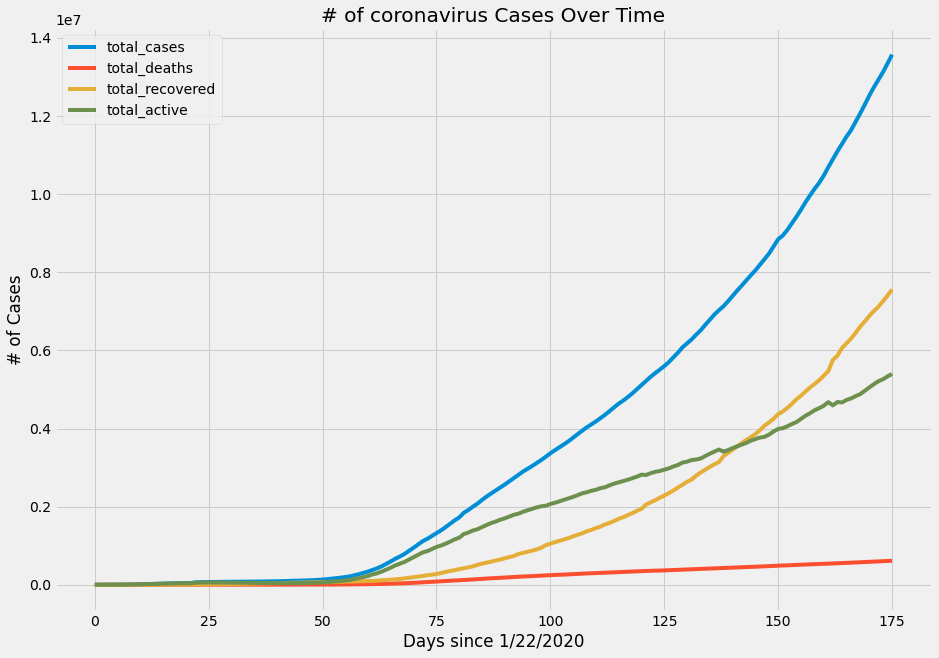

In [30]:
#Insert your code here:
data=pd.DataFrame({'total_cases':total_cases,
                   'total_deaths':total_deaths,
                   'total_recovered':total_recovered,
                   'total_active':total_active})

data.index=adjusted_dates
data.plot(kind='line', figsize=(14,10))
plt.title('# of coronavirus Cases Over Time')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('# of Cases')
plt.show()




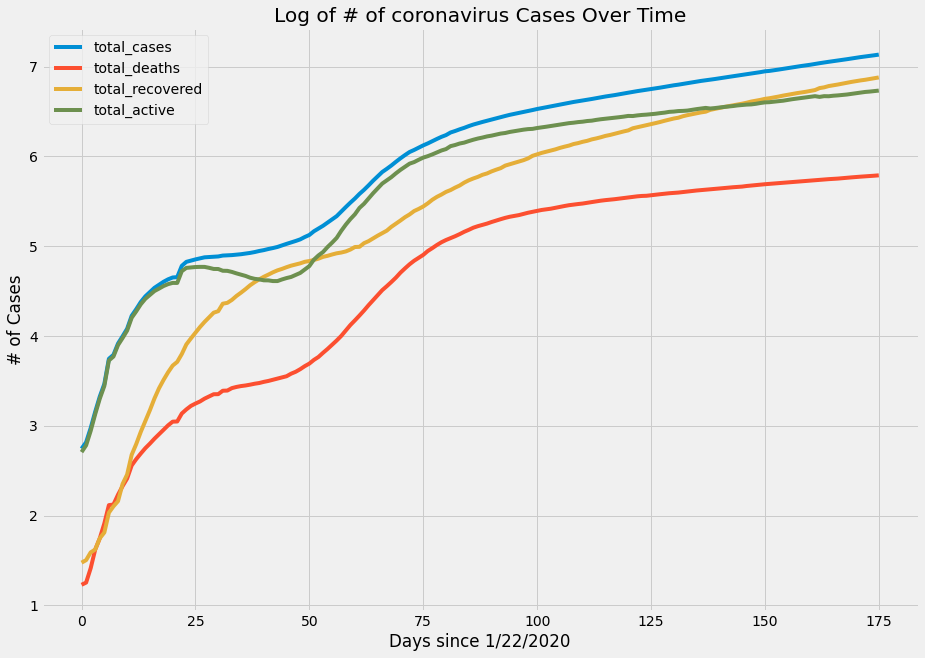

In [31]:
dataLog=data.apply(lambda x: np.log10(x))
dataLog.plot(kind='line', figsize=(14,10))
plt.title('Log of # of coronavirus Cases Over Time')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('# of Cases')
plt.show()


## Problem 3
    Visualize the number of total cases, total deaths, total recovered, and total active by time (day units) in 4 separated graphs using line chart.

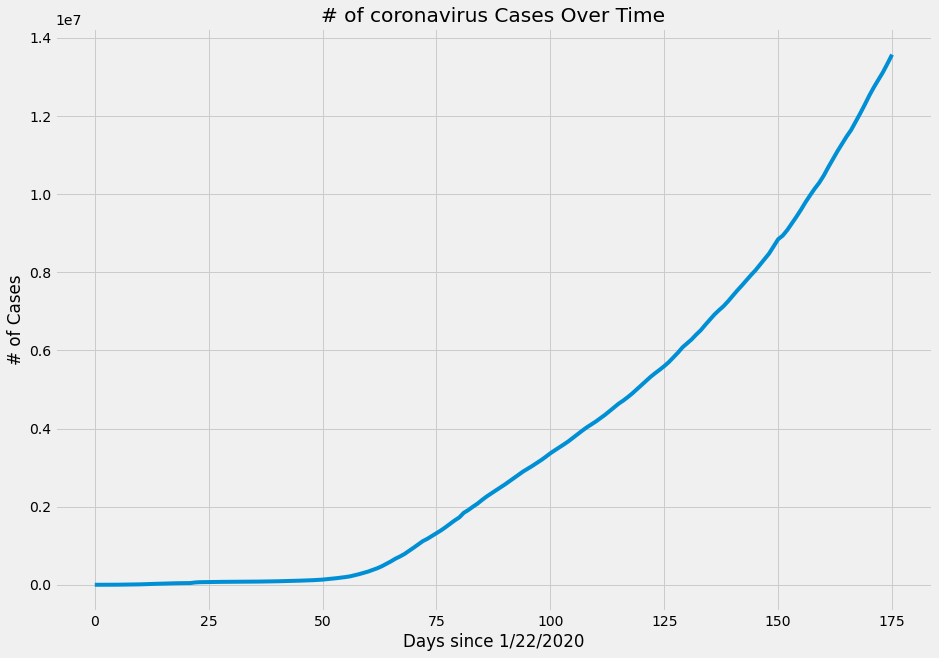

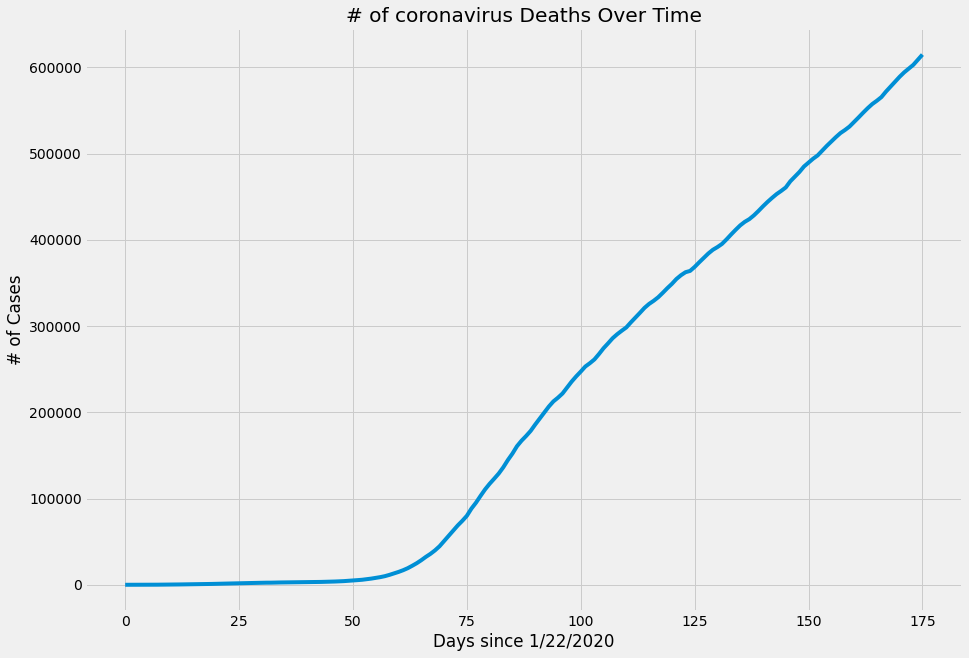

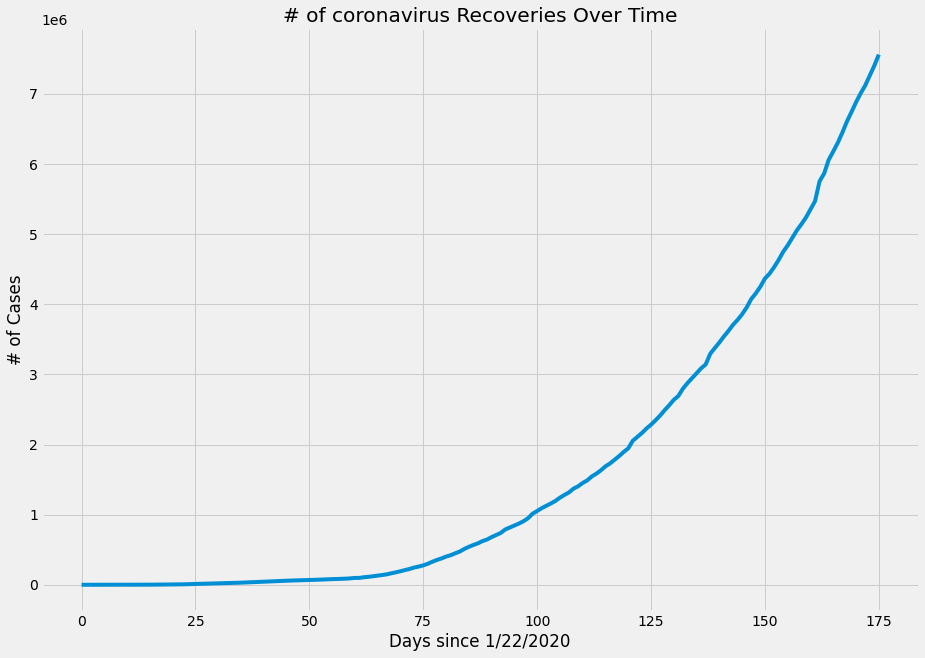

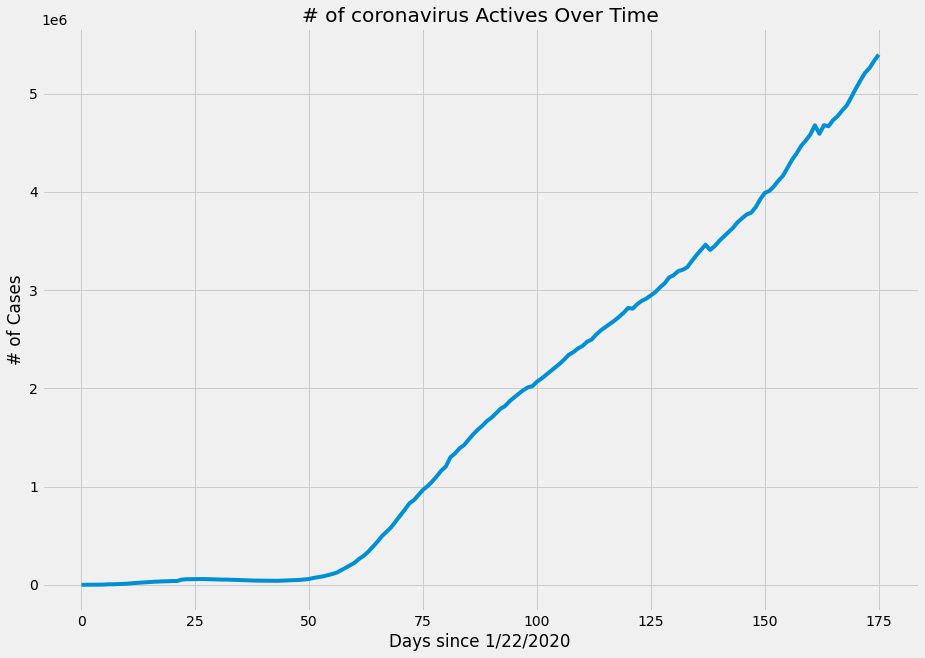

In [32]:
#Insert your code here:

title=['# of coronavirus Cases Over Time', 
       '# of coronavirus Deaths Over Time', 
      '# of coronavirus Recoveries Over Time',
       '# of coronavirus Actives Over Time' ]

for i in range(len(data.columns)):
  data.iloc[:,i].plot(kind='line',figsize=(14,10))
  plt.title(title[i])
  plt.xlabel('Days since 1/22/2020')
  plt.ylabel('# of Cases')
  plt.show()


## Problem 4
    Calculate the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units).

In [33]:
#Insert your code here:
increases_total_cases=total_cases[1:]-total_cases[:-1]
increases_total_deaths=total_deaths[1:]-total_deaths[:-1]
increases_total_active=total_active[1:]-total_active[:-1]
increases_total_recovered=total_recovered[1:]-total_recovered[:-1]

increases_data=pd.DataFrame({'increases_total_cases':increases_total_cases,
                            'increases_total_deaths':increases_total_deaths,
                            'increases_total_recovered':increases_total_recovered,
                            'increases_total_active':increases_total_active})
increases_data.index=increases_data.index+1
increases_data.index.name='Day'
increases_data.head()

,increases_total_cases,increases_total_deaths,increases_total_recovered,increases_total_active
Day,,,,
1,100,1,2,97
2,287,8,7,272
3,493,16,3,474
4,683,14,14,655
5,809,26,9,774


## Problem 5
    Visualize the number of daily increases in total cases, total deaths, total recovered, and total active by time (day units) in 4 separate graphs using the bar chart.

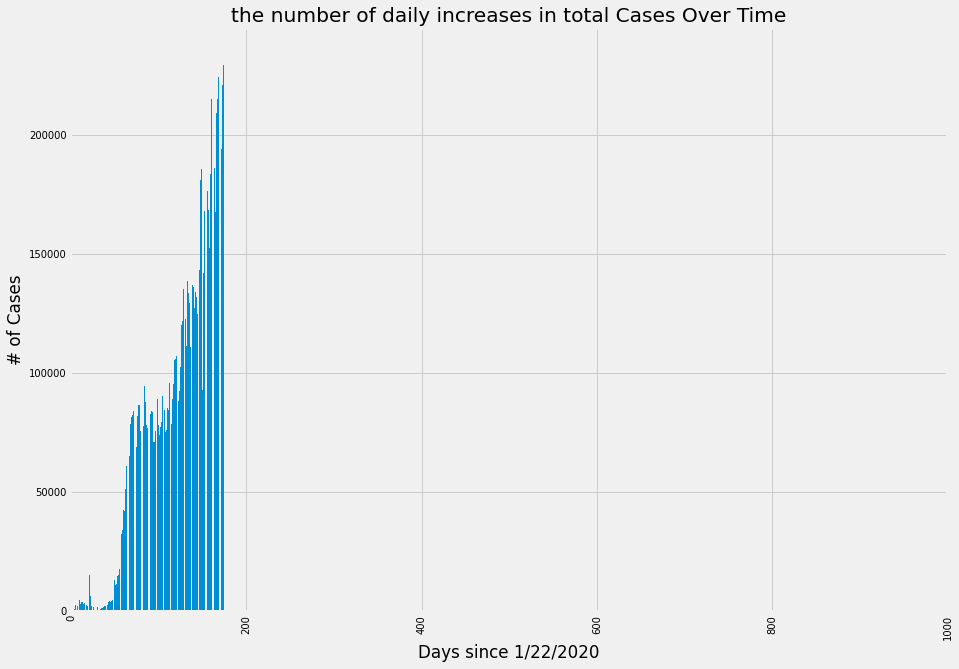

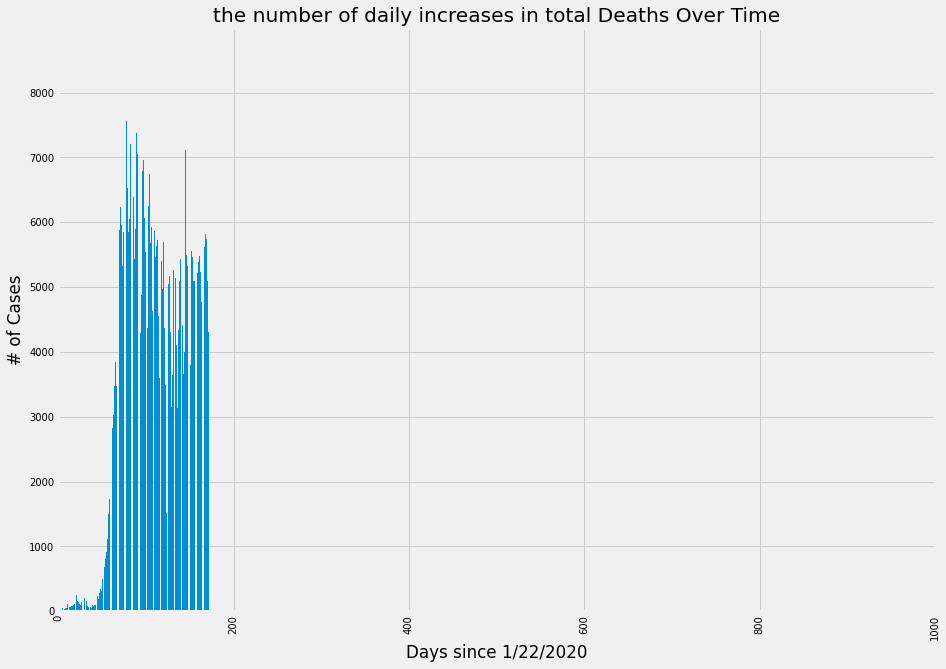

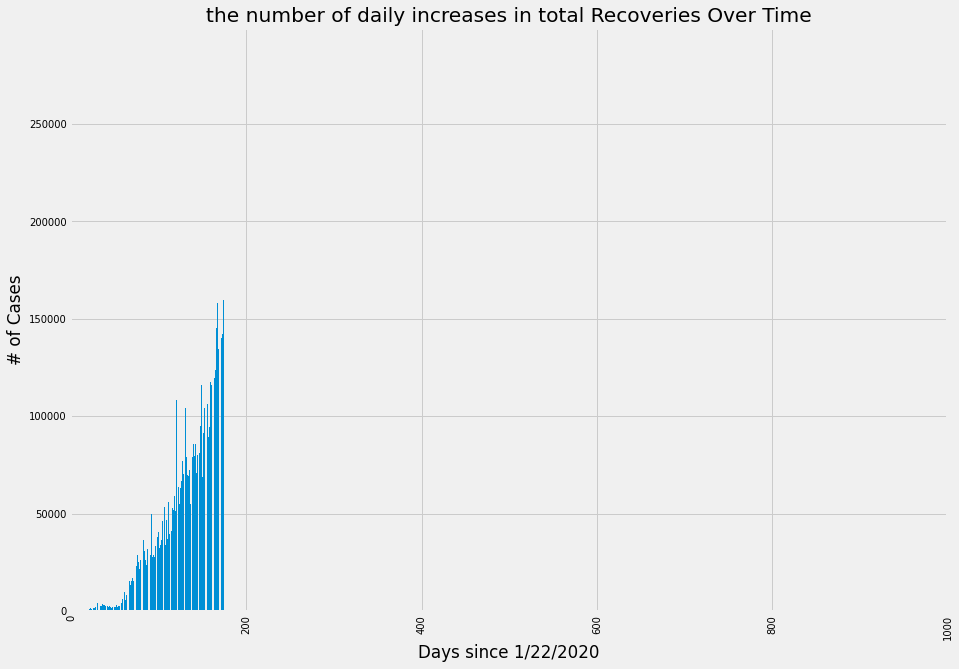

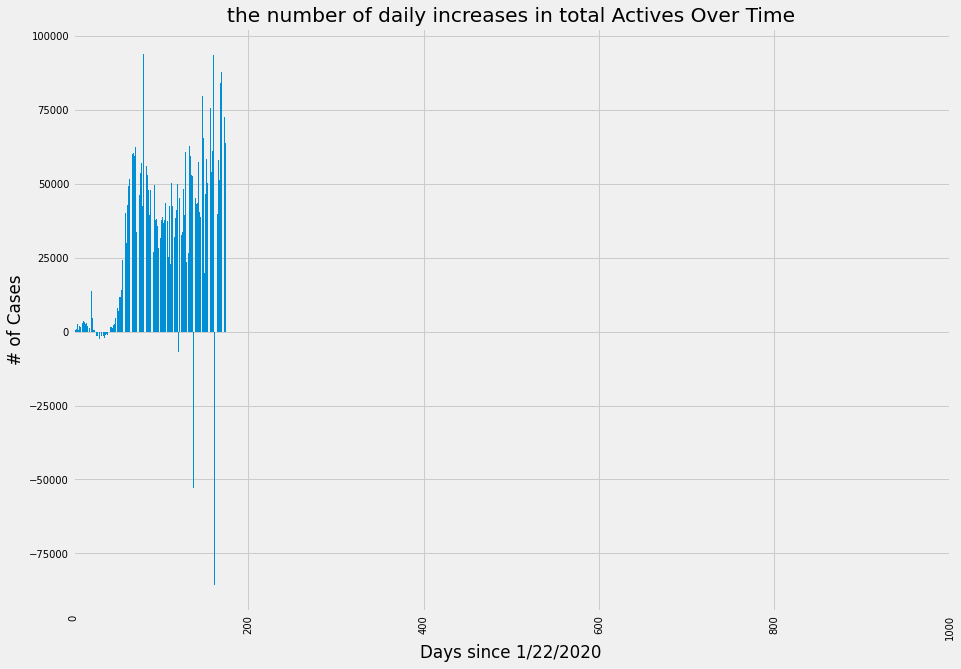

In [34]:
#Insert your code here:
title=['the number of daily increases in total Cases Over Time', 
       'the number of daily increases in total Deaths Over Time', 
      'the number of daily increases in total Recoveries Over Time',
       'the number of daily increases in total Actives Over Time' ]

for i in range(len(data.columns)):
  increases_data.iloc[:,i].plot(kind='bar',figsize=(14,10),xticks =[0,200,400,600,800,1000], fontsize=10,  width=0.8)
  plt.title(title[i])
  plt.xlabel('Days since 1/22/2020')
  plt.ylabel('# of Cases')
  plt.show()



In [35]:
# recoveries_df.iloc[:, 320:330]  41559969, 41986812 41986812 42477429 42913377 43229421 43642558 44083329 44509809 45001034 45479174 46984117
# recoveries_df.iloc[200:,329:331]


# Problem 6:
    Calculate the global mortality and recovered rate in percentage by time.

In [36]:
#Insert your code here:
data['mortality rate']= data['total_deaths']/data['total_cases']*100
data['recovery rate']= data['total_recovered']/data['total_cases']*100
average_mortality=data['mortality rate'].mean()
average_recovery=data['recovery rate'].mean()
data.head()


,total_cases,total_deaths,total_recovered,total_active,mortality rate,recovery rate
0,557,17,30,510,3.052065,5.385996
1,657,18,32,607,2.739726,4.870624
2,944,26,39,879,2.754237,4.131356
3,1437,42,42,1353,2.922756,2.922756
4,2120,56,56,2008,2.641509,2.641509


# Problem 7
**7.1** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

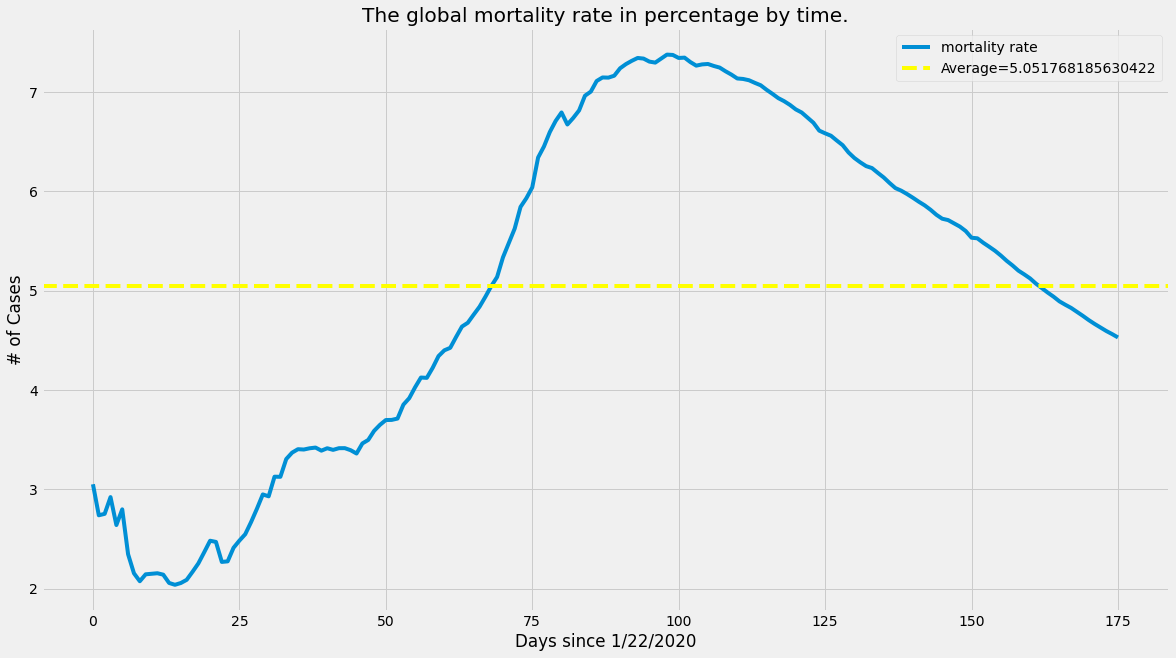

In [37]:
#Insert your code here:
# Visualize the mortality rate in by time (day units) using the line chart.

data['mortality rate'].plot(kind='line', figsize=(18,10))
plt.title('The global mortality rate in percentage by time.')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('# of Cases')
plt.axhline(y =average_mortality, color = 'yellow', label='Average={}'.format(average_mortality),linestyle = '--')
plt.legend()
plt.show()

**7.2** 

    Visualize the mortality rate in by time (day units) using the line chart.

    Using the dashline to visualize the average mortality rate of all the time.

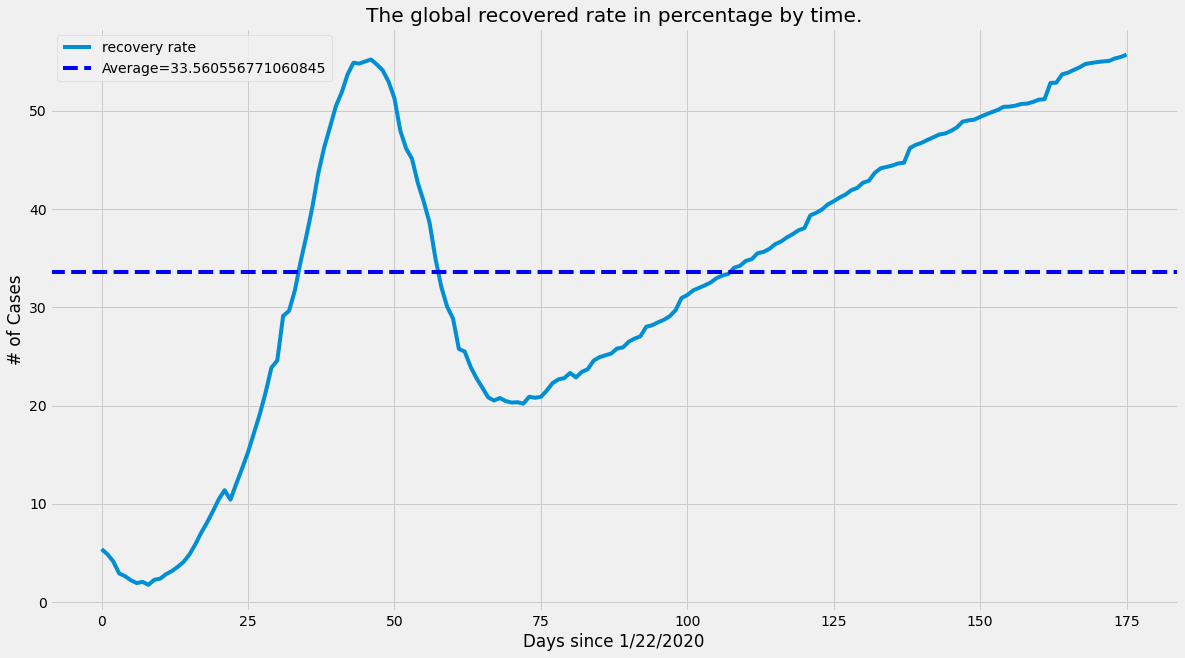

In [38]:
#Insert your code here:
# Visualize the mortality rate in by time (day units) using the line chart.

data['recovery rate'].plot(kind='line', figsize=(18,10))
plt.title('The global recovered rate in percentage by time.')
plt.xlabel('Days since 1/22/2020')
plt.ylabel('# of Cases')
plt.axhline(y =average_recovery, color = 'b', label='Average={}'.format(average_recovery),linestyle = '--')
plt.legend()
plt.show()


#  5. Continent Analysis

## Data Prerocessing

In [39]:
# Changing the conuntry names as required by pycountry_convert Lib
confirmed_df.loc[confirmed_df['Country/Region'] == "US", "Country/Region"] = "USA"
deaths_df.loc[deaths_df['Country/Region'] == "US", "Country/Region"] = "USA"
recoveries_df.loc[recoveries_df['Country/Region'] == "US", "Country/Region"] = "USA"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
deaths_df.loc[deaths_df['Country/Region'] == 'Korea, South', "Country/Region"] = 'South Korea'
recoveries_df.loc[recoveries_df['Country/Region'] == "Korea, South", "Country/Region"] = "South Korea"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
deaths_df.loc[deaths_df['Country/Region'] == 'Taiwan*', "Country/Region"] = 'Taiwan'
recoveries_df.loc[recoveries_df['Country/Region'] == "Taiwan*", "Country/Region"] = "Taiwan"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Kinshasa)', "Country/Region"] = 'Democratic Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Kinshasa)", "Country/Region"] = "Democratic Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
deaths_df.loc[deaths_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"
recoveries_df.loc[recoveries_df['Country/Region'] == "Cote d'Ivoire", "Country/Region"] = "Côte d'Ivoire"

confirmed_df.loc[confirmed_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
deaths_df.loc[deaths_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"
recoveries_df.loc[recoveries_df['Country/Region'] == "Reunion", "Country/Region"] = "Réunion"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
deaths_df.loc[deaths_df['Country/Region'] == 'Congo (Brazzaville)', "Country/Region"] = 'Republic of the Congo'
recoveries_df.loc[recoveries_df['Country/Region'] == "Congo (Brazzaville)", "Country/Region"] = "Republic of the Congo"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
deaths_df.loc[deaths_df['Country/Region'] == 'Bahamas, The', "Country/Region"] = 'Bahamas'
recoveries_df.loc[recoveries_df['Country/Region'] == "Bahamas, The", "Country/Region"] = "Bahamas"

confirmed_df.loc[confirmed_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
deaths_df.loc[deaths_df['Country/Region'] == 'Gambia, The', "Country/Region"] = 'Gambia'
recoveries_df.loc[recoveries_df['Country/Region'] == "Gambia, The", "Country/Region"] = "Gambia"

# getting all countries
countries = np.asarray(confirmed_df["Country/Region"])
countries1 = np.asarray(deaths_df["Country/Region"])
countries2 = np.asarray(recoveries_df["Country/Region"])

# Continent_code to Continent_names
continents = {
    'NA': 'North America',
    'SA': 'South America', 
    'AS': 'Asia',
    'OC': 'Australia',
    'AF': 'Africa',
    'EU' : 'Europe',
    'na' : 'Others'
}

# Defininng Function for getting continent code for country.
def country_to_continent_code(country):
    try:
        return pc.country_alpha2_to_continent_code(pc.country_name_to_country_alpha2(country))
    except :
        return 'na'


# Problem 8
    Add the field "continent" into the confirm_df, deaths_df and recorveries_df dataset:

In [40]:
#Insert your code here:
confirmed_df.insert(2, "continent", confirmed_df['Country/Region'].apply(lambda x:continents[country_to_continent_code(x)]))
deaths_df.insert(2, "continent", deaths_df['Country/Region'].apply(lambda x:continents[country_to_continent_code(x)]))
recoveries_df.insert(2, "continent", recoveries_df['Country/Region'].apply(lambda x:continents[country_to_continent_code(x)]))
recoveries_df.head()


,Province/State,Country/Region,continent,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,7/6/20,7/7/20,7/8/20,7/9/20,7/10/20,7/11/20,7/12/20,7/13/20,7/14/20,7/15/20
0,NaN,Afghanistan,Asia,33.93911,67.709953,0,0,0,0,0,...,20103,20179,20700,20847,20882,21135,21216,21254,21454,22456
1,NaN,Albania,Europe,41.15330,20.168300,0,0,0,0,0,...,1702,1744,1791,1832,1875,1881,1946,2014,2062,2091
2,NaN,Algeria,Africa,28.03390,1.659600,0,0,0,0,0,...,11884,12094,12329,12637,13124,13124,13743,14019,14295,14792
3,NaN,Andorra,Europe,42.50630,1.521800,0,0,0,0,0,...,800,800,802,802,803,803,803,803,803,803
4,NaN,Angola,Africa,-11.20270,17.873900,0,0,0,0,0,...,108,117,117,117,117,118,118,118,118,124


# Problem 9
    Create the countries_df data frame with the index as the "Country/Region" field.
    These column infor will be: 
    - continent: Country continent.
    - Deaths: Total number of confirmed.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [41]:
#Insert your code here:
Con = confirmed_df.groupby(['Country/Region']).sum().iloc[:,-1]
Dea = deaths_df.groupby(['Country/Region']).sum().iloc[:,-1]
Rec = recoveries_df.groupby(['Country/Region']).sum().iloc[:,-1]
countries_df=Con.copy().to_frame()


countries_df['Deaths']=Dea.values
countries_df['Recoveries']=Rec.values
countries_df.columns=['Confirmed','Deaths','Recoveries']
countries_df['Active']=countries_df['Confirmed']-countries_df['Deaths']-countries_df['Recoveries']
countries_df['Mortality Rate']=countries_df['Deaths']/(countries_df['Confirmed']+10**(-100))*100
countries_df.insert(0, "continent", [continents[country_to_continent_code(x)] for x in countries_df.index ]  )
countries_df.head()
countries_df

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Country/Region,,,,,,
Afghanistan,Asia,35026,1098,22456,11472,3.134814
Albania,Europe,3752,101,2091,1560,2.691898
Algeria,Africa,20770,1040,14792,4938,5.007222
Andorra,Europe,862,52,803,7,6.032483
Angola,Africa,576,27,124,425,4.687500
...,...,...,...,...,...,...
West Bank and Gaza,Others,7064,44,1084,5936,0.622877
Winter Olympics 2022,Others,0,0,0,0,0.000000
Yemen,Asia,1526,433,694,399,28.374836


# Problem 10
    Create the continents_df data frame with the index as the "continent" field.
    These column infor will be: 
    - Confirmed: Country continent.
    - Deaths: Total number of deaths.
    - Recoveries: Total number of recoveries.
    - Active: Total number of active.
    - Mortality Rate: Mortality rate in percentage.

In [42]:
#Insert your code here:
continents_df =countries_df.drop(columns=['Mortality Rate'])
continents_df=continents_df.groupby(['continent']).sum()
continents_df['Mortality Rate']=continents_df['Deaths']/(continents_df['Confirmed']+10**(-100))*100

continents_df


,Confirmed,Deaths,Recoveries,Active,Mortality Rate
continent,,,,,
Africa,643484,13988,332739,296757,2.173791
Asia,3130710,73893,2206430,850387,2.360263
Australia,12395,135,9560,2700,1.089149
Europe,2602206,193515,1491348,917343,7.436575
North America,4120069,188708,1476843,2454518,4.580215
Others,13395,177,4499,8719,1.321389
South America,3047536,144246,2037711,865579,4.733201


## Sample line ploting
Here are the sample functions for visualizing covid cases by time in each continent/country:

In [43]:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths]
    label = ["Confirmed", "Deaths"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 5 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-6])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-6])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
        


# Problem 11
**11.1** 

    Apply the visualize_covid_cases function to show up the Covid visualization of 7 continents in the 7 separated line charts. The order of visualization is sorted in descending order by the number of confirmed. 
    

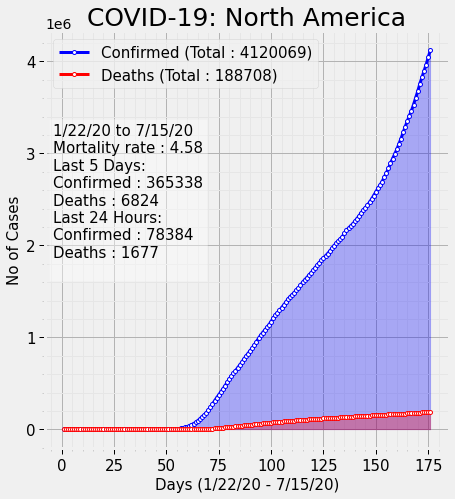

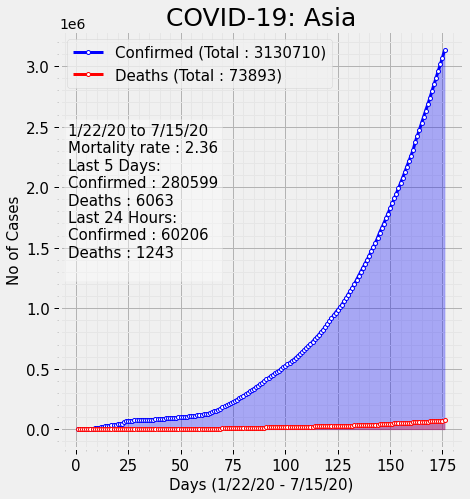

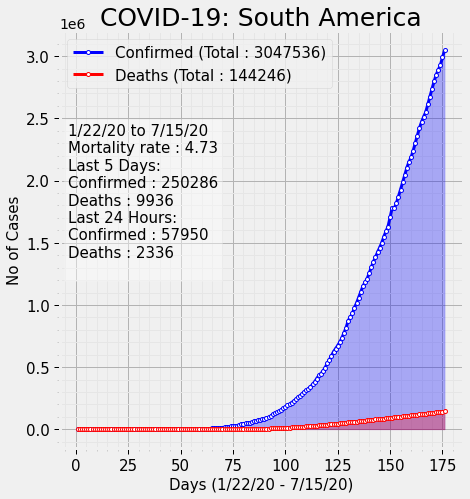

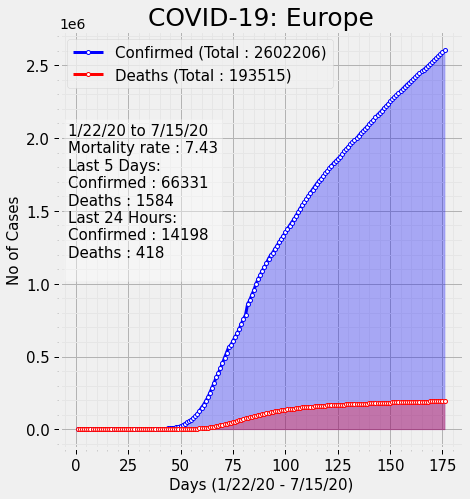

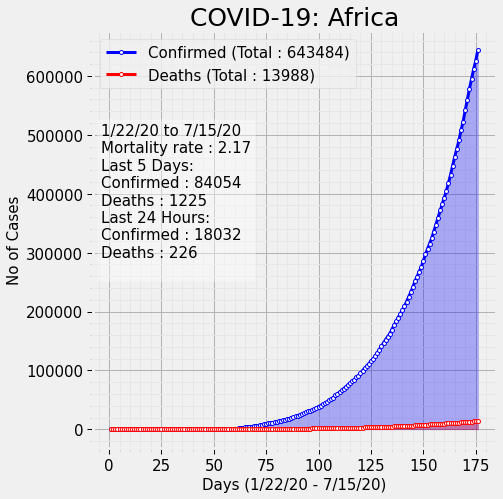

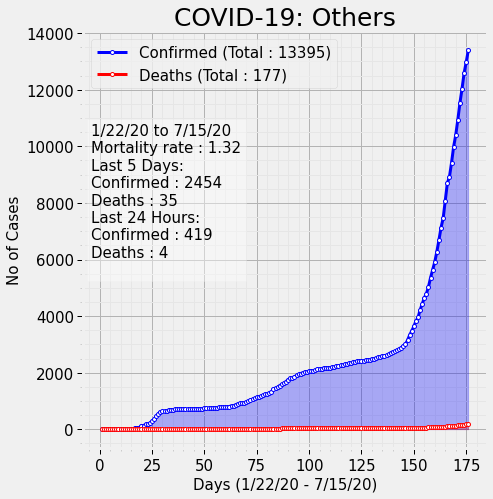

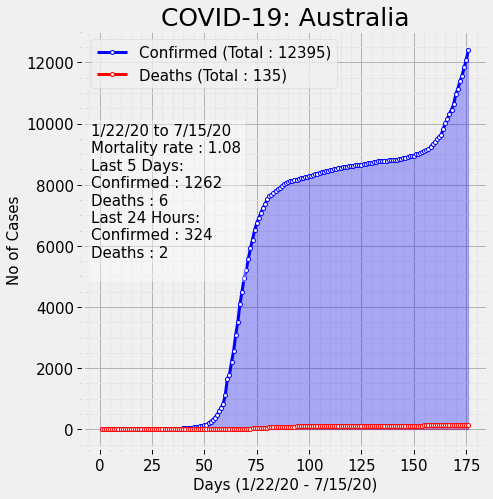

In [44]:
#Insert your code here:
IndexCtnSort=list(continents_df.sort_values(by=['Confirmed'], ascending=False).index)

for continent in IndexCtnSort:
  visualize_covid_cases(confirmed_df, deaths_df,
                          continent=continent , country = None , state = None, period = None, figure = None,
                          scale = "linear")
  



**11.2**

    Modify the "plot_params" and "visualize_covid_cases" function to: 
    - Show up the results of the last 7 days instead of 5 days.
    - Add the "Recoveries line" to the main chart.
    - Add the "Total Recoveries" number to the small table.
    - Add the "Recoveries" filed in the last 7 days and 24 hours to the information menu.

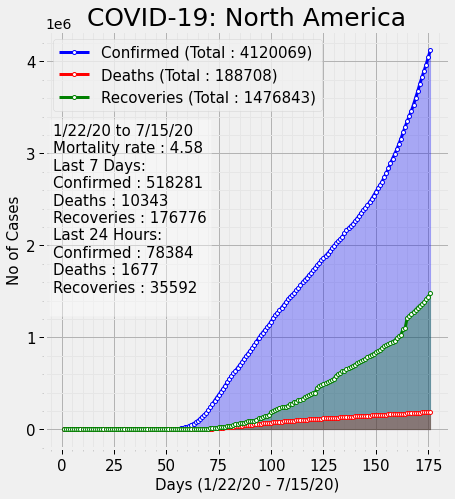

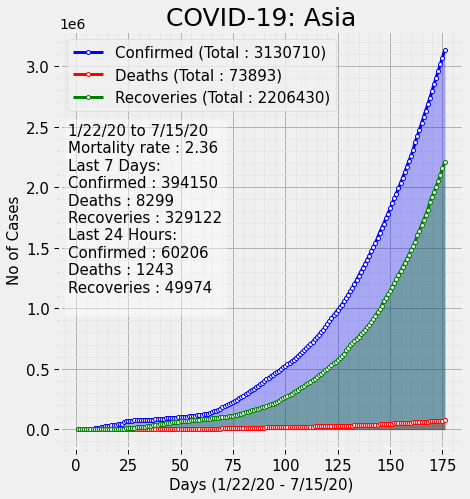

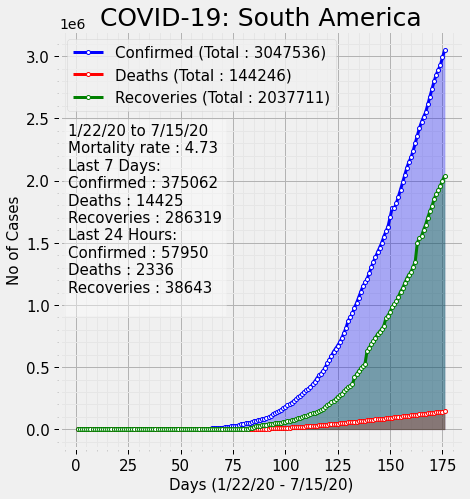

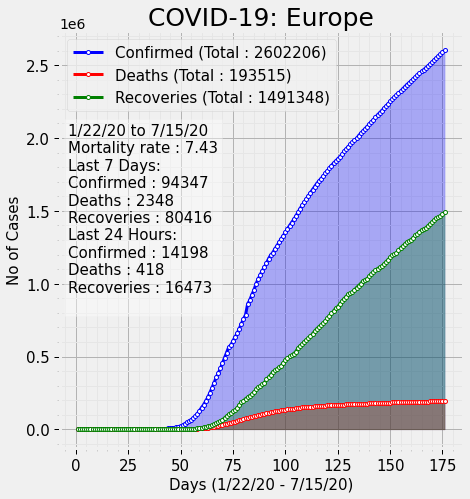

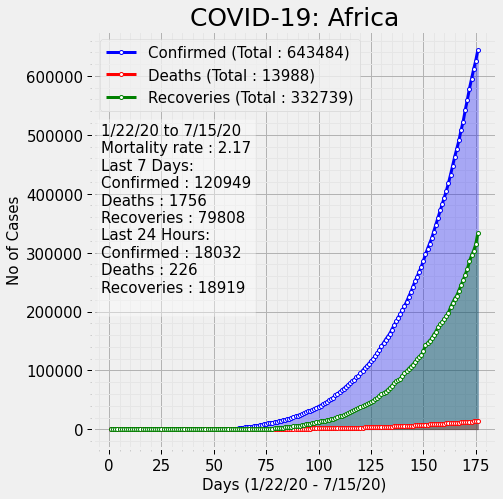

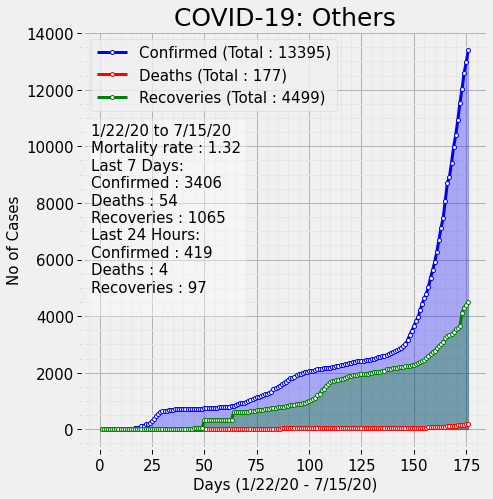

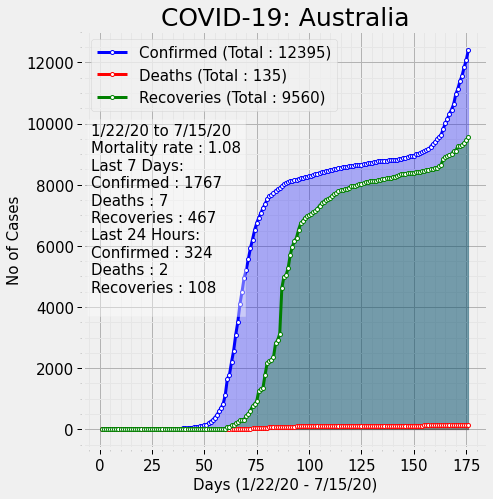

In [45]:
#Insert your code here:
def plot_params(ax,axis_label= None, plt_title = None,label_size=15, axis_fsize = 15, title_fsize = 20, scale = 'linear' ):
    # Tick-Parameters
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.yaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.tick_params(which='both', width=1,labelsize=label_size)
    ax.tick_params(which='major', length=6)
    ax.tick_params(which='minor', length=3, color='0.8')
    
    # Grid
    plt.grid(lw = 1, ls = '-', c = "0.7", which = 'major')
    plt.grid(lw = 1, ls = '-', c = "0.9", which = 'minor')

    # Plot Title
    plt.title( plt_title,{'fontsize':title_fsize})
    
    # Yaxis sacle
    plt.yscale(scale)
    plt.minorticks_on()
    # Plot Axes Labels
    xl = plt.xlabel(axis_label[0],fontsize = axis_fsize)
    yl = plt.ylabel(axis_label[1],fontsize = axis_fsize)
    
def visualize_covid_cases(confirmed, deaths,recoveries,
                          continent=None , country = None , state = None, period = None, figure = None,
                          scale = "linear"):
    x = 0
    if figure == None:
        f = plt.figure(figsize=(10,10))
        # Sub plot
        ax = f.add_subplot(111)
    else :
        f = figure[0]
        # Sub plot
        ax = f.add_subplot(figure[1],figure[2],figure[3])
    ax.set_axisbelow(True)
    plt.tight_layout(pad=10, w_pad=5, h_pad=5)
    
    stats = [confirmed, deaths,recoveries]
    label = ["Confirmed", "Deaths","Recoveries"]
    if continent != None:
        params = ["continent",continent]
    elif country != None:
        params = ["country",country]
    else: 
        params = ["All", "All"]
    color = ["blue","red","green"]
    marker_style = dict(linewidth=3, linestyle='-', marker='o',markersize=4, markerfacecolor='#ffffff')
    for i,stat in enumerate(stats):
        if params[1] == "All" :
            cases = np.sum(np.asarray(stat.iloc[:,5:]),axis = 0)[x:]
        else:
            cases = np.sum(np.asarray(stat[stat[params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        date = np.arange(1,cases.shape[0]+1)[x:]
        plt.plot(date,cases,label = label[i]+" (Total : "+str(cases[-1])+")",color=color[i],**marker_style)
        plt.fill_between(date,cases,color=color[i],alpha=0.3)
    if params[1] == "All" :
        Total_confirmed = np.sum(np.asarray(stats[0].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2].iloc[:,5:]),axis = 0)[x:]
    else :
        Total_confirmed =  np.sum(np.asarray(stats[0][stats[0][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_deaths = np.sum(np.asarray(stats[1][stats[1][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        Total_recoveries = np.sum(np.asarray(stats[2][stats[2][params[0]] == params[1]].iloc[:,5:]),axis = 0)[x:]
        
    text = stats[0].columns[5]+" to "+stats[0].columns[-1]+"\n"
    text += "Mortality rate : "+ str(int(Total_deaths[-1]/(Total_confirmed[-1])*10000)/100)+"\n"
    text += "Last 7 Days:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-8])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-8])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-8])+"\n"
    text += "Last 24 Hours:\n"
    text += "Confirmed : " + str(Total_confirmed[-1] - Total_confirmed[-2])+"\n"
    text += "Deaths : " + str(Total_deaths[-1] - Total_deaths[-2])+"\n"
    text += "Recoveries : " + str(Total_recoveries[-1] - Total_recoveries[-2])+"\n"
    
    plt.text(0.02, 0.78, text, fontsize=15, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes,bbox=dict(facecolor='white', alpha=0.4))
    
    # Plot Axes Labels
    axis_label = ["Days ("+confirmed_df.columns[5]+" - "+confirmed_df.columns[-1]+")","No of Cases"]
    
    # Plot Parameters
    plot_params(ax,axis_label,scale = scale)
    
    # Plot Title
    if params[1] == "All" :
        plt.title("COVID-19 Cases World",{'fontsize':25})
    else:   
        plt.title("COVID-19: "+params[1] ,{'fontsize':25})
        
    # Legend Location
    l = plt.legend(loc= "best",fontsize = 15)
    
    if figure == None:
        plt.show()
for continent in IndexCtnSort:
  # plt.figure(figsize=(16,16))
  visualize_covid_cases(confirmed_df, deaths_df,recoveries_df,
                          continent=continent , country = None , state = None, period = None, figure = None,
                          scale = "linear")  


# Problem 12
    Visualize the covariance matrix for continents_df.

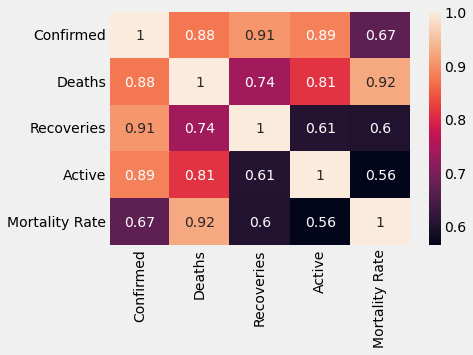

In [46]:
#Insert your code here:
sns.heatmap(continents_df.corr(), annot=True)

# Problem 13
    Build the pie chart to compare proportions of the number of confirmed, deaths, recoveries, and active of the 7 continents.
    Each field (confirm, deaths, ...) should be presented in different pie charts.
    You are not allowed to use repeated code snippet here, let try to use a for loop.
    Each continent should be presented in different colors.

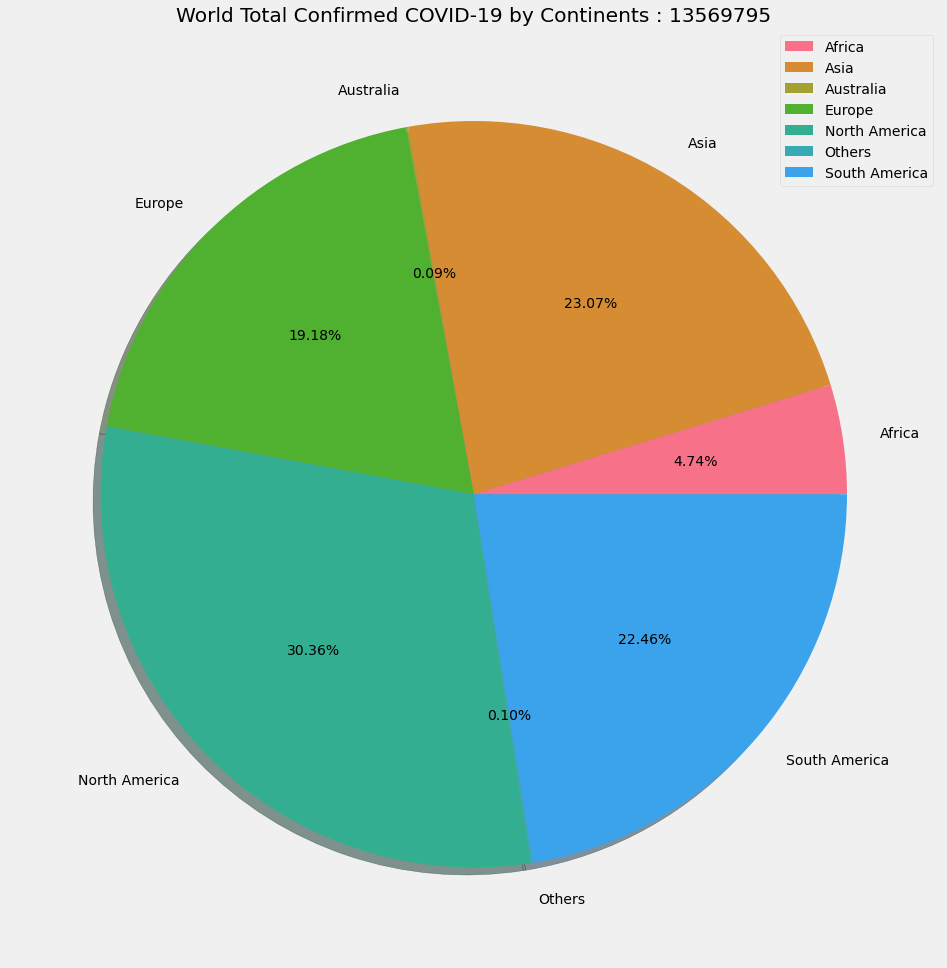

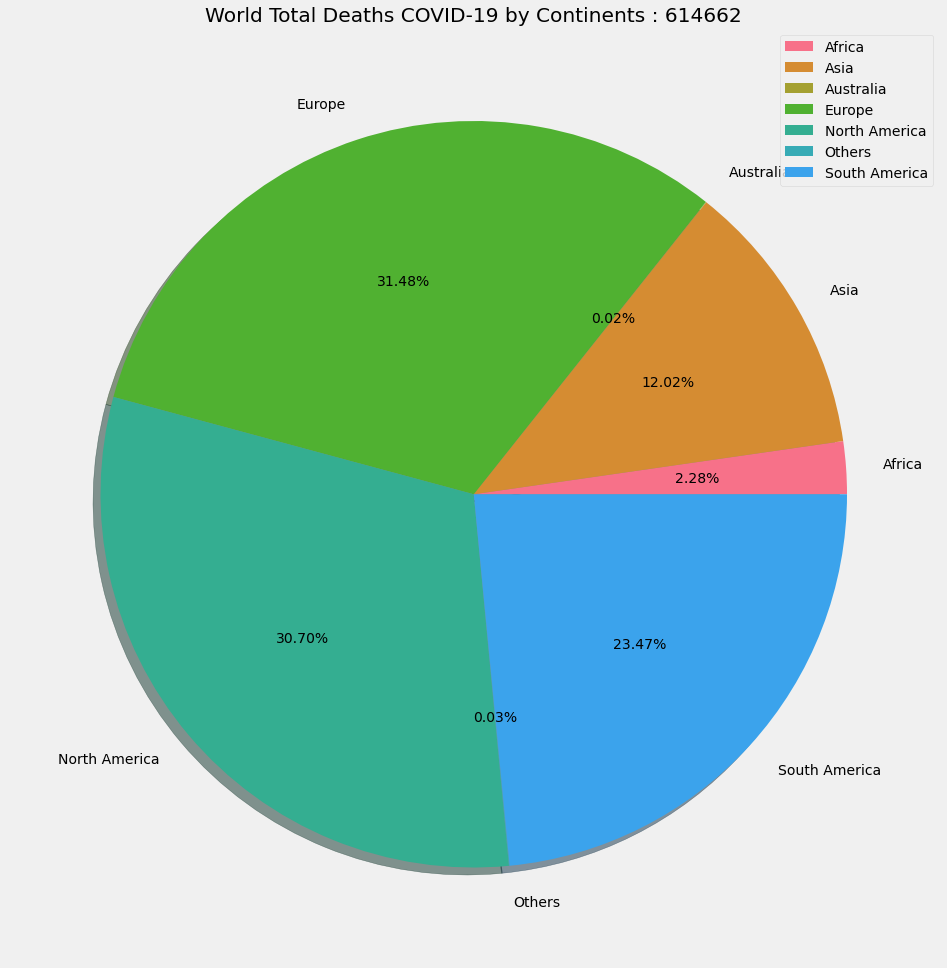

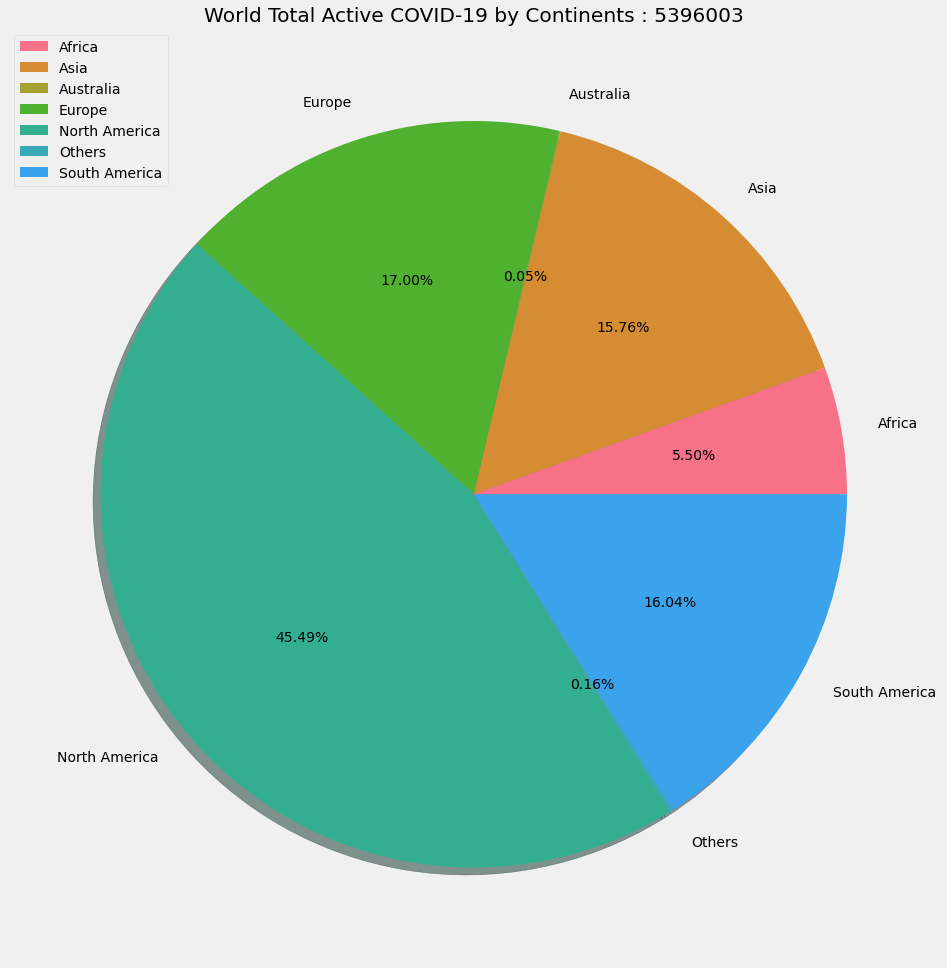

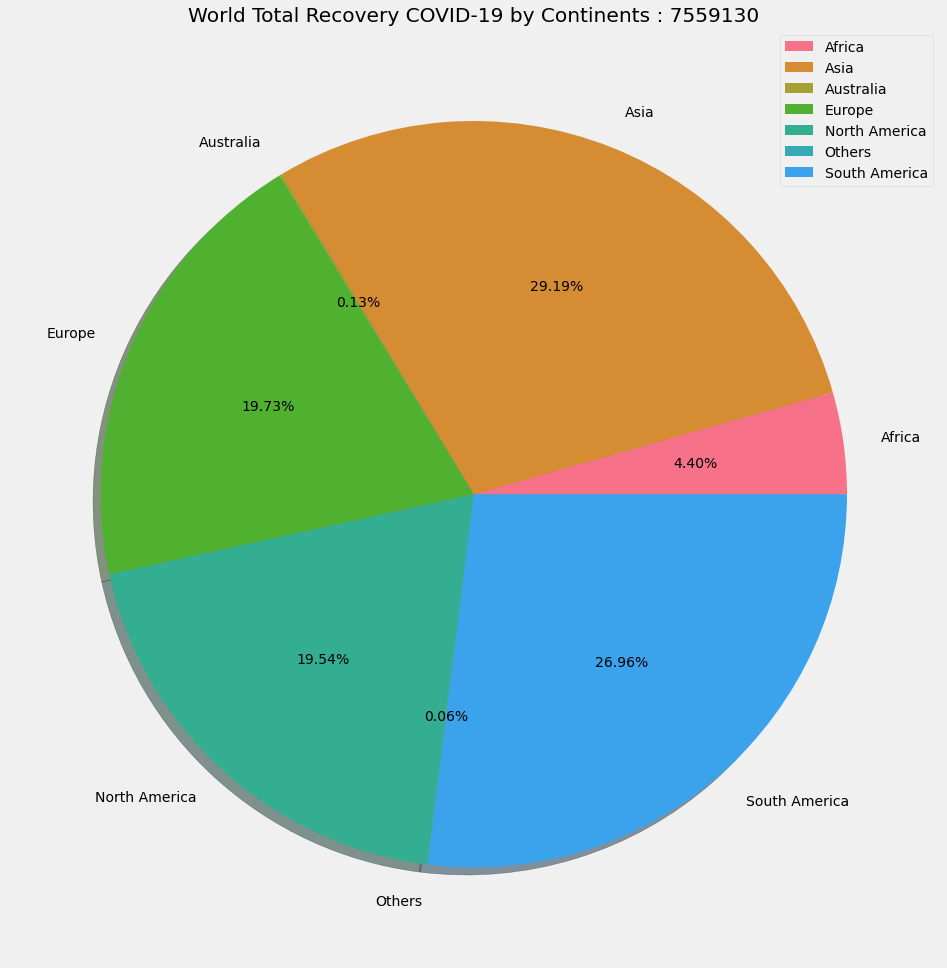

In [47]:
#Insert your code here:
fea=['Confirmed','Deaths','Active','Recoveries']
forTitlte=['Confirmed','Deaths','Active','Recovery']
def drawPie(data, keyTitle):
  labels = list(continents_df.index)
  colors = sns.color_palette('husl',9)
  plt.figure(figsize=(16,16)) 
  plt.pie(data, labels = labels, colors = colors, autopct='%.2f%%', shadow=True)
  plt.title('World Total {} COVID-19 by Continents : {}'.format(keyTitle,data.values.sum()))
  plt.legend()
  plt.show()
for i in range(4):
  drawPie(continents_df[fea[i]], forTitlte[i])


# 6. Country analysis

# Problem 14
    Build a folium map to show up the number of confirmed, deaths, recovered and mortality rate of each country based on countries' location. The radius of the cicle is proportional to the number of confirmed.
![title](problem14.png)

In [48]:
#Insert your code here:

position = confirmed_df[['Country/Region','Lat','Long']].copy()
position.dropna(inplace=True)
position=position.groupby(['Country/Region']).last()
position['Confirmed']=countries_df['Confirmed'].values
position['Deaths']=countries_df['Deaths'].values
position['Recoveries']=countries_df['Recoveries'].values
position['Mortality Rate']=countries_df['Mortality Rate'].values

Radius=countries_df['Confirmed']/countries_df['Confirmed'].max()
m = folium.Map()
for i in range(0,len(position)):
  html = '''{}<br>
            Confirmed: {}<br>
            Death: {}<br>  
            Recovered: {} <br>
            Mortality Rate: {:.2f}
            '''.format(list(position.index)[i],
                       position['Confirmed'].values[i],
                       position['Deaths'].values[i],
                       position['Recoveries'].values[i],
                       position['Mortality Rate'].values[i])
  iframe = folium.IFrame(html,
                       width=200,
                       height=100)
  popup = folium.Popup(iframe,
                     max_width=200)
  folium.CircleMarker(
      location=[position.iloc[i]['Lat'], position.iloc[i]['Long']],
      popup=popup,
      radius=(Radius[i]*30),
      fill=True,
      tooltip = html

   ).add_to(m)

m




# Problem 15
Build a px [(plotly.express)](https://plotly.com/python/plotly-express/) map to show up the number of active of each country in log(10) based on countries' name using the "spectral" color.

In [49]:
#Insert your code here:
countries_actives_log=countries_df[['Active']].copy()
countries_actives_log['Active']=countries_actives_log['Active'].apply(lambda x: np.log10(x))
countries_actives_log = countries_actives_log.reset_index(level=0)
fig = px.bar(countries_actives_log, "Country/Region", "Active", color= 'Active')
fig.show()


# Problem 16
    Filter the top 10 countries based on the number of confirmed cases.

In [50]:
#Insert your code here:
countries_top10=countries_df.copy()
countries_top10=countries_top10.sort_values(by=['Active'], ascending=False).head(10)
countries_top10

,continent,Confirmed,Deaths,Recoveries,Active,Mortality Rate
Country/Region,,,,,,
USA,North America,3501177,137948,1075882,2287347,3.940046
Brazil,South America,1973933,75604,1350098,548231,3.830120
India,Asia,968857,24914,612768,331175,2.571484
United Kingdom,Europe,293465,41010,1386,251069,13.974409
Russia,Europe,745197,11753,522375,211069,1.577167
South Africa,Africa,311049,4453,160693,145903,1.431607
France,Europe,212614,30125,78945,103544,14.168869
Colombia,South America,165169,5814,68806,90549,3.520031
Bangladesh,Asia,193590,2457,105523,85610,1.269177


# Problem 17
    Visualize the top 10 confirmed countries with number active, recoveries and deaths cases using the stacked bar chart.
![title](problem17.png)

In [51]:
#Insert your code here:
countries_top10_chart=countries_top10[['Active','Recoveries','Deaths']]
countries_top10_chart = countries_top10_chart.reset_index(level=0)
countries_top10_chart
fig = px.bar(countries_top10_chart, x="Country/Region", y=['Active','Recoveries','Deaths'])
fig.show()

# 7. Advanced Analysis
 

# Problem 18
    Based on the data visualization on global part, does the COVID 2019 epidemic in the world has reached its peak?
    Put your answer here:

Dựa vào số ca gia tăng mỗi ngày và tổng số ca mắc Covid 2019 thì dịch bệnh đã tạo đỉnh về số ca gia tăng trong 1 ngày, hiện tại mức gia tăng trong ngày đang thấp hơn mức đỉnh đã được tạo từ trước đến nay. 

# Problem 19:
Based on the data visualization on the continent part:

    19.1 Which continent has the highest death rate over continents' active cases?

    19.2 Which continent has the highest rate on COVID 2019 spread rate over continents' active cases?
    
    19.3 Which continent has the highest recoveries rate over continents' dataset?

(Note: COVID 2019 Spread rate = Number of new confirmed in the last 10 days / number of active before).
Put your answer here:


19.1 : South America

19.2 : Others

19.3: South America

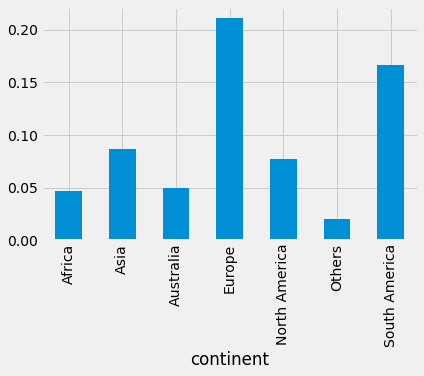

In [52]:
# trực quan tỉ lệ tử vong trên số ca active
continents_df1=continents_df.copy()
continents_df1['Die_over_active']=continents_df1['Deaths']/continents_df1['Active']
continents_df1['Die_over_active'].plot(kind='bar')

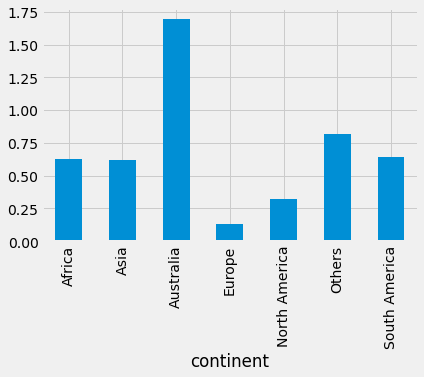

In [53]:
# trực quan tỉ lệ lây lan trên số ca active
days10=confirmed_df.groupby(['continent']).sum().iloc[:,[-10,-1]]
days10.columns=['Last10daysConfirm', 'CurentConfirm']
days10['Last10daysActive']=confirmed_df.groupby(['continent']).sum().iloc[:,-10]-deaths_df.groupby(['continent']).sum().iloc[:,-10]-recoveries_df.groupby(['continent']).sum().iloc[:,-10]
days10['Spread_rate']=(days10['CurentConfirm']-days10['Last10daysConfirm'])/days10['Last10daysActive']
days10['Spread_rate'].plot(kind='bar')

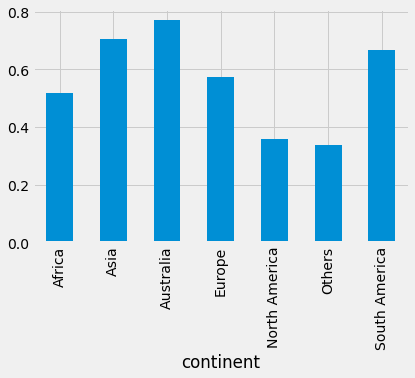

In [54]:
# trực quan tỉ lệ phục hồi
continents_df2=continents_df.copy()
continents_df2['Recovery Rate']=continents_df2['Recoveries']/continents_df2['Confirmed']
continents_df2['Recovery Rate'].plot(kind='bar')

# Problem 20
Based on the data visualization on the country part:

    20.1 Which country has the highest death rate over countries' dataset?

    20.2 Which country has the highest rate on COVID 2019 spread rate over countries'dataset?
    
    20.3 Which country has the highest recoveries rate over countries' dataset?
Put your answer here:

20.1 MS Zaandan

20.2 Samoa

20.3 Micronesia

In [55]:
#  trực quan tỉ lệ tử vong
countries_df1=countries_df.copy()
fig = px.bar(countries_df1, countries_df1.index, 'Mortality Rate', color= 'Mortality Rate')
fig.show()

In [56]:
#  trực quan tỉ lệ lây lan
CT=confirmed_df.groupby(['Country/Region']).sum().iloc[:,[-10,-1]]
CT.columns=['Last10daysConfirm', 'CurentConfirm']
CT['Last10daysActive']=confirmed_df.groupby(['Country/Region']).sum().iloc[:,-10]-deaths_df.groupby(['Country/Region']).sum().iloc[:,-10]-recoveries_df.groupby(['Country/Region']).sum().iloc[:,-10]
CT['Spread_rate']=(CT['CurentConfirm']-CT['Last10daysConfirm'])/CT['Last10daysActive']
fig = px.bar(CT, CT.index, 'Spread_rate', color= 'Spread_rate')
fig.show()

In [57]:
# #  trực quan tỉ lệ hồi phục
CT2=countries_df.copy()
CT2['Recovery Rate']=CT2['Recoveries']/CT2['Confirmed']
fig = px.bar(CT2, CT2.index, 'Recovery Rate', color= 'Recovery Rate')
fig.show()

# Problem 21
**USA dataset**

In [58]:
us_medical_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports_us/07-06-2020.csv')

In [59]:
us_medical_data.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-07-07 04:34:13,32.3182,-86.9023,44932,1007,22082.0,21843.0,1,916.383942,663719.0,2914.0,2.241164,84000001,USA,13536.486998,6.493159
1,Alaska,US,2020-07-07 04:34:13,61.3707,-152.4044,1184,16,548.0,620.0,2,161.849237,123753.0,NaN,1.351351,84000002,USA,16916.662680,NaN
2,American Samoa,US,2020-07-07 04:34:13,-14.2710,-170.1320,0,0,NaN,NaN,60,0.000000,696.0,NaN,NaN,16,ASM,1250.876152,NaN
3,Arizona,US,2020-07-07 04:34:13,33.7298,-111.4312,101455,1829,11836.0,87790.0,4,1393.858286,873294.0,5188.0,1.802770,84000004,USA,8488.322873,5.113597
4,Arkansas,US,2020-07-07 04:34:13,34.9697,-92.3731,24253,292,17834.0,6127.0,5,803.663856,344968.0,1575.0,1.203975,84000005,USA,11431.093603,6.494042


Based on the USA data:

    21.1 Which state has the highest death rate over states' dataset?

    21.2 Which state has the highest rate on COVID 2019 spread rate over states' dataset?
    
    21.3 Which state has the highest recoveries rate over states' dataset?

In [60]:
#Insert your code here:
us_medical_data['recoveries rate']=us_medical_data['Recovered']/us_medical_data['Confirmed']

print('21.1 State has the highest death rate over states\' dataset: ', 
      list(us_medical_data.loc[us_medical_data['Mortality_Rate']==us_medical_data['Mortality_Rate'].max(),'Province_State' ])[0])
print('21.2 State has the highest rate on COVID 2019 spread rate over states\' dataset:',
      list(us_medical_data.loc[us_medical_data['Incident_Rate']==us_medical_data['Incident_Rate'].max(),'Province_State' ])[0])
print('21.3 State has the highest recoveries rate over states\' dataset:',
      list(us_medical_data.loc[us_medical_data['recoveries rate']==us_medical_data['recoveries rate'].max(),'Province_State' ])[0])


21.1 State has the highest death rate over states' dataset:  Connecticut
21.2 State has the highest rate on COVID 2019 spread rate over states' dataset: New York
21.3 State has the highest recoveries rate over states' dataset: Minnesota


# Problem 22
Build a regression model (or more than 1 model) to predict the number of new confirmed in the top 10 states which have the highest number of confirmed cases in the USA.

In [61]:
#Insert your code here:
# Chúng ta tạo dữ liệu datapre bằng cách lọc bộ dữ liệu us_medical_data gồm
# 10 bang có số  ghi nhận cao nhất.
datapre=us_medical_data.sort_values(by=['Confirmed'], ascending=False).head(10).copy()


# kiểm tra số dữ liệu thiếu trong từng cột
Col=list(datapre.columns)
missCol=[]
for col in Col:
  if datapre[col].isnull().sum()>=0.4:
    missCol.append(col)

# ta loại bỏ các cột có % missing values lớn.
datapre.drop(columns=missCol, inplace=True)


# loại bỏ các cột dữ liệu không cần thiết.'Country_Region', 'Last_Update', 'ISO3', 'FIPS'
datapre.drop(columns=['Country_Region', 'Last_Update', 'ISO3', 'UID','FIPS'], inplace=True)
datapre=datapre.set_index(['Province_State'])
datapre



,Lat,Long_,Confirmed,Deaths,Incident_Rate,People_Tested,Mortality_Rate,Testing_Rate
Province_State,,,,,,,,
New York,42.1657,-74.9481,397649,32057,2044.093624,4288131.0,8.061632,22042.910293
California,36.1162,-119.6816,284361,6367,719.589986,4793353.0,2.233000,12131.316935
Florida,27.7663,-81.6868,206447,3778,961.213930,3559399.0,1.830010,16572.504822
Texas,31.0545,-97.5635,204534,2872,705.389845,2163729.0,1.404168,7462.194372
New Jersey,40.2989,-74.5210,174766,15229,1967.600333,1549209.0,8.713937,17441.745786
Illinois,40.3495,-88.9861,147865,7026,1166.880435,1783962.0,4.751632,14078.181818
Massachusetts,42.2302,-71.5301,110137,8198,1597.924586,899417.0,7.443457,13049.207233
Arizona,33.7298,-111.4312,101455,1829,1393.858286,873294.0,1.802770,8488.322873
Georgia,33.0406,-83.6431,97064,2878,914.195469,958953.0,2.965054,9031.880900


<Figure size 432x432 with 0 Axes>

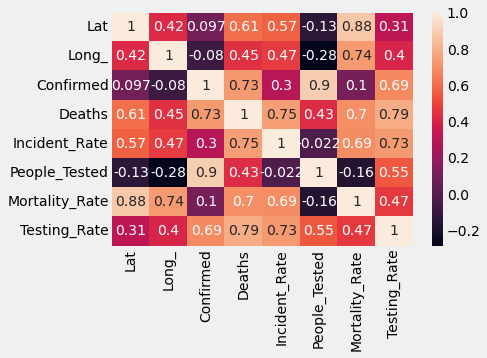

<Figure size 432x432 with 0 Axes>

In [62]:
# kiểm tra mối tương quan giữa các biến
sns.heatmap(datapre.corr(), annot=True);
plt.figure(figsize=(6,6))

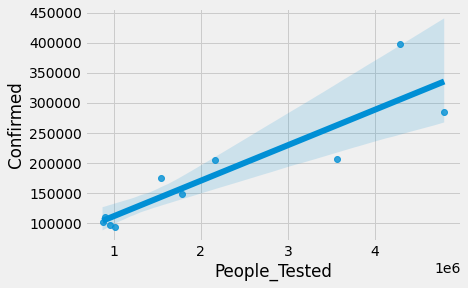

In [63]:
# ta xây dựng sơ đồ hồi quy về số ca nhiễm dự đoán thông qua biến 'People_Tested'
sns.regplot(x='People_Tested', y='Confirmed', data=datapre)

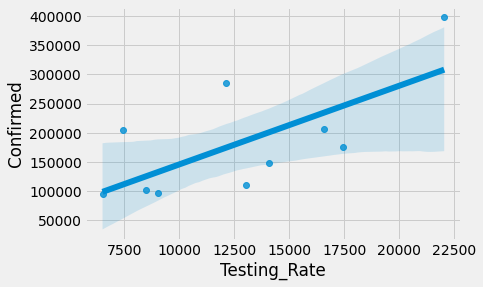

In [64]:
# ta xây dựng sơ đồ hồi quy về số ca nhiễm dự đoán thông qua biến 'Testing_Rate'
sns.regplot(x='Testing_Rate', y='Confirmed', data=datapre)